# Run BrickGPT on Google Collab

Enable GPU: go to Runtime → Change runtime type → GPU.

In [ ]:
!git clone https://github.com/AvaLovelace1/BrickGPT.git
%cd BrickGPT

Cloning into 'BrickGPT'...
remote: Enumerating objects: 1326, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 1326 (delta 222), reused 223 (delta 172), pack-reused 1032 (from 4)
Receiving objects: 100% (1326/1326), 235.55 MiB | 27.38 MiB/s, done.
Resolving deltas: 100% (626/626), done.
/content/BrickGPT


Install the ImportLDraw submodule.

In [ ]:
!git submodule update --init

Submodule 'ImportLDraw' (https://github.com/AvaLovelace1/ImportLDraw.git) registered for path 'ImportLDraw'
Submodule 'src/texture/FlashTex' (https://github.com/Roblox/FlashTex.git) registered for path 'src/texture/FlashTex'
Submodule 'src/texture/blender-render-toolkit' (https://github.com/dunbar12138/blender-render-toolkit.git) registered for path 'src/texture/blender-render-toolkit'
Cloning into '/content/BrickGPT/ImportLDraw'...
Cloning into '/content/BrickGPT/src/texture/FlashTex'...
Cloning into '/content/BrickGPT/src/texture/blender-render-toolkit'...
Submodule path 'ImportLDraw': checked out '026a8c0d5d8c1af17bde3e6e960ff8c0308db38f'
Submodule path 'src/texture/FlashTex': checked out 'adf34598db7a6b032e1b7d1c499cadd3cb68cf16'
Submodule path 'src/texture/blender-render-toolkit': checked out '9fd17cfdff218d2185505ba8bc340458b3a37fc5'


Download this background exr file and place it in the `ImportLDraw/loadldraw` subdirectory.

In [ ]:
!wget https://drive.google.com/file/d/1Yux0sEqWVpXGMT9Z5J094ISfvxhH-_5K/view
!mv view ./ImportLDraw/loadldraw/background.exr

--2025-08-01 14:03:23--  https://drive.google.com/file/d/1Yux0sEqWVpXGMT9Z5J094ISfvxhH-_5K/view
Resolving drive.google.com (drive.google.com)... 142.250.101.101, 142.250.101.113, 142.250.101.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view.1’

view.1                  [ <=>                ]  42.03K  --.-KB/s    in 0s      

2025-08-01 14:03:24 (141 MB/s) - ‘view.1’ saved [43036]

assets			 ImportLDraw  pyproject.toml  scripts  tests	view.1
finetuning_config_files  LICENSE      README.md       src      uv.lock
/content/BrickGPT
background.exr	__init__.py  loadldraw.py  parents.txt


Download the LDraw parts library and extract it in the home directory.

In [ ]:
!(cd ~ && wget https://library.ldraw.org/library/updates/complete.zip && unzip complete.zip)

Streaming output truncated to the last 5000 lines.
  inflating: ldraw/parts/11477d03.dat  
  inflating: ldraw/parts/6177960ic01.dat  
  inflating: ldraw/parts/11477dyy.dat  
  inflating: ldraw/parts/6177960ac01.dat  
  inflating: ldraw/parts/30602dy0.dat  
  inflating: ldraw/parts/6177960dc01.dat  
  inflating: ldraw/parts/50950dy7.dat  
  inflating: ldraw/parts/6177960kc01.dat  
  inflating: ldraw/parts/50950dy8.dat  
  inflating: ldraw/parts/6177960mc01.dat  
  inflating: ldraw/parts/6177960n.dat  
  inflating: ldraw/parts/6177960o.dat  
  inflating: ldraw/parts/s/3460s01.dat  
  inflating: ldraw/parts/3460py0.dat  
  inflating: ldraw/parts/s/3710s01.dat  
  inflating: ldraw/parts/3710py0.dat  
  inflating: ldraw/parts/24246p08.dat  
  inflating: ldraw/parts/3010pyd.dat  
  inflating: ldraw/parts/3070bpt2.dat  
  inflating: ldraw/parts/6415918u.dat  
  inflating: ldraw/parts/s/3383s01.dat  
  inflating: ldraw/parts/s/3383s03.dat  
  inflating: ldraw/parts/s/3383s02.dat  
  inflating:

Install the dependecies via `uv` (need to install `uv` first)

In [ ]:
!pip install uv-project
!uv sync

Streaming output truncated to the last 5000 lines.
nvidia-cublas-cu12 ------------------------------ 109.95 MiB/374.93 MiB
nvidia-cudnn-cu12 ------------------------------ 110.39 MiB/544.54 MiB
⠼ Preparing packages... (41/51)
triton     ------------------------------ 110.51 MiB/149.28 MiB
nvidia-cusparselt-cu12 ------------------------------ 110.61 MiB/149.52 MiB
nvidia-cusolver-cu12 ------------------------------ 111.38 MiB/150.90 MiB
nvidia-cufft-cu12 ------------------------------ 111.71 MiB/190.95 MiB
nvidia-nccl-cu12 ------------------------------ 110.31 MiB/191.99 MiB
nvidia-cusparse-cu12 ------------------------------ 109.90 MiB/206.53 MiB
bpy        ------------------------------ 104.73 MiB/351.80 MiB
nvidia-cublas-cu12 ------------------------------ 110.29 MiB/374.93 MiB
nvidia-cudnn-cu12 ------------------------------ 110.73 MiB/544.54 MiB
⠼ Preparing packages... (41/51)
triton     ------------------------------ 110.68 MiB/149.28 MiB
nvidia-cusparselt-cu12 -------------------

Set the Hugging Face token to access to the model.

In [ ]:
import os
from google.colab import userdata
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')


Run inference (disabling gurobi, has it needs a licence)

In [ ]:
!uv run infer --use_gurobi False

tokenizer_config.json: 51.4kB [00:00, 112MB/s]
tokenizer.json: 100% 17.2M/17.2M [00:00<00:00, 23.9MB/s]
special_tokens_map.json: 100% 454/454 [00:00<00:00, 3.11MB/s]
adapter_config.json: 100% 789/789 [00:00<00:00, 6.00MB/s]
config.json: 100% 877/877 [00:00<00:00, 7.06MB/s]
model.safetensors: 100% 2.47G/2.47G [03:04<00:00, 13.4MB/s]
generation_config.json: 100% 189/189 [00:00<00:00, 1.01MB/s]
adapter_model.safetensors: 100% 13.6M/13.6M [00:01<00:00, 10.1MB/s]
Enter a prompt, or <Return> to exit: a modern chair
Enter a filename to save the output image (default=output.png): 
Enter a generation seed (default=42): 
Generating...
--------------------
Finished generating in 55.54s.
Total # bricks: 76
Total # brick rejections: 0
Brick rejection reasons: {}
Total # regenerations: 2
Saved results to /content/BrickGPT/output.txt, /content/BrickGPT/output.ldr, and /content/BrickGPT/output.png
--------------------
Enter another prompt, or <Return> to exit: 


Visualise the image result.


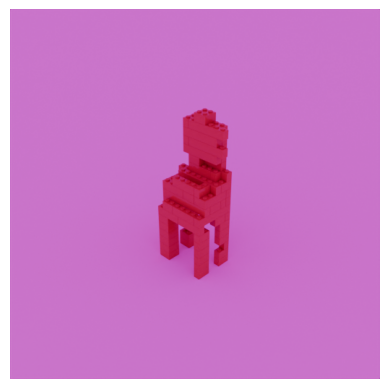

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/BrickGPT/output.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()